In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from plots import *
from math import sqrt

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', **{'family': 'sans-serif',
              'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (8, 6)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_style("ticks")

In [3]:
xls = pd.ExcelFile("Final Plotting/Experiment - 2.xlsx")

In [4]:
df1 = pd.read_excel(xls, sheet_name="Resnet_cifar10", index_col=0)
df2 = pd.read_excel(xls, sheet_name="Resnet_cifar100", index_col = 0)
df3 = pd.read_excel(xls, sheet_name="Resnet_SVHN", index_col=0)
df4 = pd.read_excel(xls, sheet_name="Resnet_FashionMNIST", index_col = 0)

# Resnet CIFAR10

In [5]:
df1.head()

,Unnamed: 1,Accuracy on CIFAR10,Unnamed: 3,Unnamed: 4
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,Random
0.0,0,75.02,79.55,75.02
1.0,20,77.82,78.59,76.18
2.0,36,77.6,78.62,79.54
3.0,48.8,78.1,78.01,81.68


In [6]:
df1 = df1.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR10":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"Random"})

In [7]:
df1 = df1.iloc[1:]

In [8]:
df1.dropna(inplace = True)

In [9]:
x = np.float64(df1["% Pruned"].values)
cifar_10 = np.float64(df1["CIFAR10"].values)
cifar_100 = np.float64(df1["CIFAR100"].values)
rd = np.float64(df1["Random"].values)

In [10]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

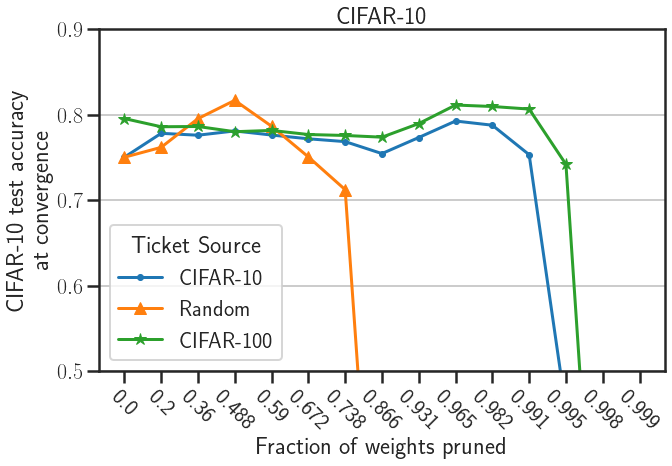

In [11]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.title("CIFAR-10")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-10 test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.5,0.90)
plt.tight_layout()
plt.savefig("finalplots/Exp2_ResNet_CIFAR10_N.pdf")

# ResNET CIFAR 100

In [12]:
df2.head()

,Unnamed: 1,Accuracy on CIFAR100,Unnamed: 3,Unnamed: 4
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,Random
0.0,0,42.17,42.46,42.46
1.0,20,43.58,43.1,39.04
2.0,36,42.73,42.84,46.49
3.0,48.8,41.85,42.77,48.81


In [13]:
df2 = df2.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on CIFAR100":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"Random"})

In [14]:
df2.dropna(inplace = True)
df2 = df2.iloc[1:]

In [15]:
x = np.float64(df2["% Pruned"].values)
cifar_10 = np.float64(df2["CIFAR10"].values)
cifar_100 = np.float64(df2["CIFAR100"].values)
rd = np.float64(df2["Random"].values)

In [16]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

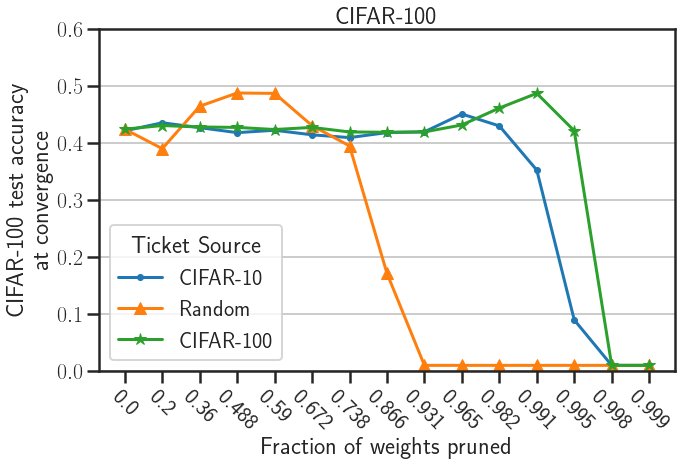

In [17]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.title("CIFAR-100")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("CIFAR-100 test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.0,0.6)
plt.tight_layout()
plt.savefig("finalplots/Exp2_ResNet_CIFAR100_N.pdf")

# SVHN

In [18]:
df3.head()

,Unnamed: 1,Accuracy on SVHN,Unnamed: 3,Unnamed: 4,Unnamed: 5
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,SVHN,Random
0.0,0,93.581,93.7308,91.2684,91.2684
1.0,20,89.39,94.0035,93.2352,93.3467
2.0,36,92.4708,93.8883,90.5808,94.3569
3.0,48.8,92.0713,94.0381,93.1315,94.0227


In [19]:
df3 = df3.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on SVHN":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"SVHN","Unnamed: 5":"Random"})

In [20]:
df3.dropna(inplace = True)
df3 = df3.iloc[1:]

In [21]:
df3.head()

,% Pruned,CIFAR10,CIFAR100,SVHN,Random
0.0,0,93.581,93.7308,91.2684,91.2684
1.0,20,89.39,94.0035,93.2352,93.3467
2.0,36,92.4708,93.8883,90.5808,94.3569
3.0,48.8,92.0713,94.0381,93.1315,94.0227
4.0,59.04,93.0317,93.9613,92.9663,92.4093


In [22]:
x = np.float64(df3["% Pruned"].values)
cifar_10 = np.float64(df3["CIFAR10"].values)
cifar_100 = np.float64(df3["CIFAR100"].values)
svhn =  np.float64(df3["SVHN"].values)
rd = np.float64(df3["Random"].values)

In [23]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

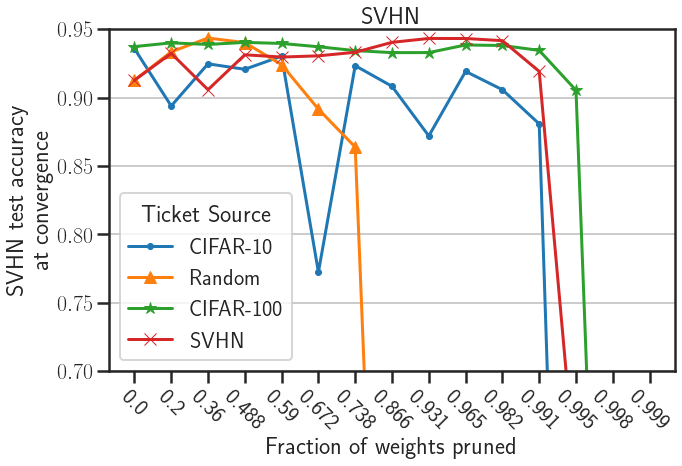

In [24]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.plot([i for i in range(len(idx))], [svhn[i]/100 for i in idx], label='SVHN', marker='x')

plt.title("SVHN")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("SVHN test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.7,0.95)
plt.tight_layout()
plt.savefig("finalplots/Exp2_ResNet_SVHN_N.pdf")

In [5]:
df4.head()

,Unnamed: 1,Accuracy on FashionMNIST,Unnamed: 3,Unnamed: 4,Unnamed: 5
NaN,Percentage of Weights Prune,CIFAR10,CIFAR100,FashionMNINST,Random
0.0,0,87.68,80.59,74.16,74.16
1.0,20,83.11,76.65,75.35,81.31
2.0,36,86.76,82.34,56.84,83.2
3.0,48.8,81.88,79.84,71.71,83.12


In [6]:
df4 = df4.rename(columns = {"Unnamed: 1":"% Pruned", "Accuracy on FashionMNIST":"CIFAR10", "Unnamed: 3":"CIFAR100", "Unnamed: 4":"FashionMNIST","Unnamed: 5":"Random"})

In [7]:
df4.dropna(inplace = True)
df4 = df4.iloc[1:]

In [8]:
df4.head()

,% Pruned,CIFAR10,CIFAR100,FashionMNIST,Random
0.0,0,87.68,80.59,74.16,74.16
1.0,20,83.11,76.65,75.35,81.31
2.0,36,86.76,82.34,56.84,83.2
3.0,48.8,81.88,79.84,71.71,83.12
4.0,59.04,86.24,80.46,72,79.42


In [9]:
x = np.float64(df4["% Pruned"].values)
cifar_10 = np.float64(df4["CIFAR10"].values)
cifar_100 = np.float64(df4["CIFAR100"].values)
fmnist =  np.float64(df4["FashionMNIST"].values)
rd = np.float64(df4["Random"].values)

In [10]:
idx_vals = [0,20,36,48.8,59.04,67.23,73.79,86.58,93.13,96.48,98.2,99.08,99.53,99.81,99.88]
idx = []
for i in range(len(x)):
    for j in range(len(idx_vals)):
        if x[i] == idx_vals[j]:
            idx.append(i)
idx.sort()

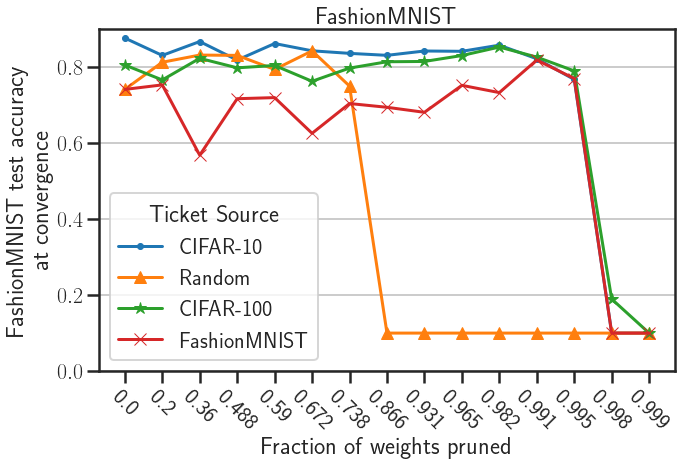

In [11]:
plt.figure(figsize=(10,7))
plt.plot([i for i in range(len(idx))], [cifar_10[i]/100 for i in idx], label='CIFAR-10', marker = '.')
plt.plot([i for i in range(len(idx))], [rd[i]/100 for i in idx], label="Random", marker='^')
plt.plot([i for i in range(len(idx))], [cifar_100[i]/100 for i in idx], label='CIFAR-100', marker='*')
plt.plot([i for i in range(len(idx))], [fmnist[i]/100 for i in idx], label='FashionMNIST', marker='x')

plt.title("FashionMNIST")
plt.xlabel("Fraction of weights pruned")
plt.ylabel("FashionMNIST test accuracy\n at convergence")
tick_lbls = [np.round(x[i]/100, 3) for i in idx]
plt.xticks(range(len(idx)), tick_lbls, rotation = -45)
plt.grid(axis='y')
plt.legend(loc="best",title="Ticket Source")
plt.ylim(0.0,0.9)
plt.tight_layout()
plt.savefig("finalplots/Exp2_Resnet_FashionMNIST1_N1.pdf")